# retrieve tweets

In [1]:
import os
import tweepy as tw
import pandas as pd

consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_tokem'
access_secret= 'access_secret'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [86]:
app = ["@SinDelantalMx", '@DidifoodMX', '@RappiMexico', '@ubereats_mex']

date_since = "2020-01-01"


In [87]:
tweets = []
for w in app:
    user_name = w

    replies = tw.Cursor(api.search, q='to:{} filter:mentions'.format(user_name), tweet_mode='extended').items()

    tweets.extend([(w,tweet) for tweet in replies])



In [88]:
# tweets[0][1]

In [89]:
df = pd.DataFrame(columns=['app', 'author','coordinates','created_at','favorite_count','geo','place','retweeted','retweet_count','full_text'])

for i in range(len(tweets)):
    df.loc[i] = pd.Series({
                             'app': tweets[i][0],
                             'author' : tweets[i][1].author.screen_name,
                             'coordinates' : tweets[i][1].coordinates,
                             'created_at' : tweets[i][1].created_at,
                             'favorite_count' : tweets[i][1].favorite_count,
                             'geo' : tweets[i][1].geo,
                             'place' : tweets[i][1].place,
                             'retweeted' : tweets[i][1].retweeted,
                             'retweet_count' : tweets[i][1].retweet_count,
                             'full_text' : tweets[i][1].full_text}
                           )



In [90]:
# df.to_csv('base.csv')

In [91]:
df

,app,author,coordinates,created_at,favorite_count,geo,place,retweeted,retweet_count,full_text
0,@SinDelantalMx,SinDelantalMx,None,2020-07-16 23:49:27,0,None,None,False,0,@DrAaronMx Comen de a poquito... según. 😂
1,@SinDelantalMx,SinDelantalMx,None,2020-07-16 23:47:44,1,None,None,False,0,@Fl4k4ch1 Eso son ligas mayores... https://t.c...
2,@SinDelantalMx,SinDelantalMx,None,2020-07-16 19:30:03,2,None,None,False,0,"@txxnvger @GarzonJacque ¡¿20?! \n\nBueno, es q..."
3,@SinDelantalMx,SinDelantalMx,None,2020-07-15 15:10:49,0,None,None,False,0,@lexCari @pobrecitobebe https://t.co/PFv1HvxOve
4,@SinDelantalMx,SinDelantalMx,None,2020-07-15 15:09:25,0,None,None,False,0,@iGeophysicist Gracias por compartir. 👀
...,...,...,...,...,...,...,...,...,...,...
551,@RappiMexico,RappiMexico,None,2020-07-09 13:03:42,0,None,None,False,0,@ElizabethHPG ¡Hola Elizabeth! Lamentamos los ...
552,@RappiMexico,RappiMexico,None,2020-07-09 12:06:18,0,None,None,False,0,@JuanCaLima ¡Hola! Por favor revisa tu DM. 📲
553,@RappiMexico,RappiMexico,None,2020-07-09 12:03:47,0,None,None,False,0,@Jerry85 ¡Hola Gerardo!🖐🏼 Cuéntanos ¿en qué po...
554,@RappiMexico,RappiMexico,None,2020-07-09 01:58:38,0,None,None,False,0,"@MarieMondrieu ¡Hola, Marie! Entendemos tu pre..."


# classify sentiment

In [92]:
from classifier import *
clf = SentimentClassifier()

In [93]:
df['sentiment_score'] = df.full_text.apply(lambda x: clf.predict(x))

In [94]:
str(df['created_at'][0].date())

'2020-07-16'

In [95]:
print(tweets[3][1].full_text)

@lexCari @pobrecitobebe https://t.co/PFv1HvxOve


In [96]:
df['geo'].describe()


count       0
unique      0
top       NaN
freq      NaN
Name: geo, dtype: object

# quick viz

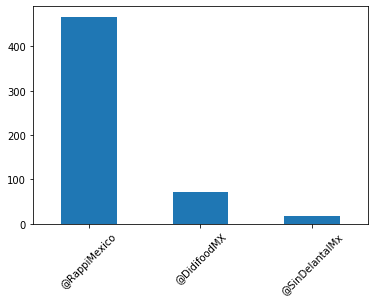

In [97]:
df.app.value_counts().plot.bar(rot=45)

In [98]:
df['date'] = df.created_at.apply(lambda x: str(x.date()))

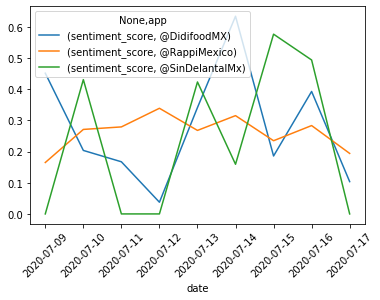

In [99]:
df[['date','app','sentiment_score']]\
    .groupby([df.date, df.app])\
    .mean().unstack('app', fill_value=0)\
    .plot(rot=45)

In [100]:
df['is_positive'] = df.sentiment_score.apply(lambda x: x > 0.5)
df['is_negative'] = df.sentiment_score.apply(lambda x: x <= 0.5)
df['flag'] = df.sentiment_score.apply(lambda x: 1)

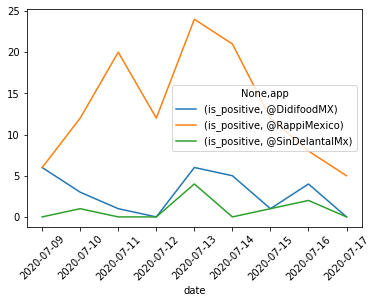

In [101]:
df.loc[df.is_positive, ['date','app','is_positive']]\
    .groupby([df.date, df.app])\
    .sum().unstack('app', fill_value=0)\
    .plot(rot=45)

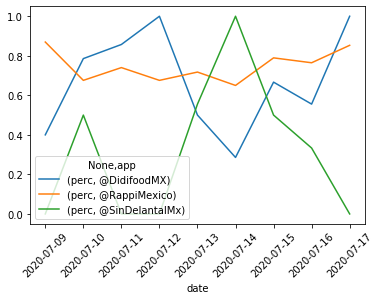

In [102]:
pos = df[['date','app','is_negative','flag']]\
    .groupby([df.date, df.app])\
    .agg({'is_negative': sum, 'flag': sum})

pos['perc'] = pos.is_negative / pos.flag

pos[['perc']].unstack('app', fill_value=0)\
    .plot(rot=45)

# word count

In [ ]:
'mi', 'pedido', 'nunca', 'llego', 'su', 'aplicacion', 'es', 'basura'

In [103]:
from nltk.tokenize import word_tokenize, sent_tokenize

puncts = [',', '.', '"', ':', ')', '(', '-','¡', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '´',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√']

def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct == '<' or punct == '>':
            x = x.replace(punct, f' ')
        if punct in x:
            x = x.replace(punct, f' ')
            
    x = x.replace('\n', ' ')

    x = re.sub(r'\d+', ' ', x.lower()) # remove digits
    x = re.sub(r'\s\s+', ' ', x) # remove n-sized space n>1 
    
    return x

import unidecode
import string
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from spacy.lang.es import Spanish

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('es_core_news_md')
aditional_sw = set(['y','o','a','nan','oz','gr','ml',' ','  ', '   ', '    ',
                    '     ', '      ','....','paquete','promo','promocion','combo',
                    'promociones', 'promoción','exclusiva','persona',
                    'descuento', 'desc','oferta', 'rebaja', 
                    'menu','menú', 'comida','delicioso','deliciosa',
                    'rico','rica','especialidad', 'especialidades',
                    'favorito','favorita','personal','chica','grande',
                    'pequeña','chico','pequeño','individual','compartir',
                    'sindelantalmx','https', 'rappimexico', 'mex', 
                    'didifoodmx', 'ubereats', 'uber', 'rappi', 'didi'
                   ])

aditional_sw = aditional_sw.union(set([w+'s' for w in aditional_sw]))

stop_words = spacy.lang.es.stop_words.STOP_WORDS.union(aditional_sw) 

# Load tokenizer, tagger, parser, NER and word vectors
parser = Spanish()

# Creating our tokenizer function
def spacy_tokenizer(sentence):    
    # Creating our token object, which is used to create documents with linguistic annotations.
        

    mytokens = sentence.split(' ')

#     mytokens = [word.lemma_ for word in mytokens]
    
    # Removing stop words
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations and len(word)>2]
    
    # return preprocessed list of tokens
    return (mytokens)


In [104]:
from collections import Counter

def keywords(column = 'tokens',category = None):
    if category:
        tokens = df_[column][df['app'] == category]
    else:
        tokens = df_[column]
    alltokens = []
    #import pdb;pdb.set_trace()
    for token_list in tokens:
        alltokens.extend(token_list)
    counter = Counter(alltokens)
    mc = counter.most_common(10)
    
    for elem in mc:
        print(elem[0] + ': ' +str(elem[1]))


In [110]:
%%time
df_ = df

df_['tokens'] = df_['full_text'].map(clean_text).apply(spacy_tokenizer)


CPU times: user 63.2 ms, sys: 0 ns, total: 63.2 ms
Wall time: 60.4 ms


### If you want to see frequent words from positive-negative tweets apply the filter below:

In [111]:
df_ = df_[df_.is_negative]

In [112]:
keywords(category='@SinDelantalMx')

burgerkingmx: 2
gemagcc: 2
ligas: 1
mayores: 1
euyanqemzn: 1
lexcari: 1
pobrecitobebe: 1
pfv: 1
hvxove: 1
entendimos: 1


In [113]:
keywords(category='@DidifoodMX')

puedes: 39
hola: 35
experiencia: 28
detalles: 26
ayudarte: 23
gusto: 21
situación: 15
déjanos: 14
vuim: 13
increíble: 12


In [114]:
keywords(category='@RappiMexico')

hola: 341
correo: 248
favor: 203
asociados: 189
teléfono: 178
electrónico: 155
compártenos: 134
número: 131
contactaremos: 123
ayudarte: 122


In [72]:
keywords(category='@ubereats_mex')

pedido: 51
repartidor: 23
servicio: 22
necesito: 14
cobro: 13
hice: 11
pague: 11
efectivo: 11
hola: 10
ayuda: 10


# ToDo

1- Verify API limits  
2- Consolidate cleaning  
3- Find out about coordinates  
4- analyze n-gram coocurrence  